# Manipulating time series data by Data Camp
## Part 3 : Window Functions: Rolling & Expanding Metrics  

#### How to calculate a running return

#### Single period return : $ \large r\tiny{i-1}  = \frac{\large P{\small i}}{\large P{\small i-1}} \large - 1$  

#### Multi-period return : $  \large R{\tiny T}   = \frac{\large P{\small N} - P{\small 0}}{P{\small 0}} - 1 =\large  (1 + \large r{\tiny 1})(1 +\large r{\tiny 2})(1 +\large r{\tiny 3})...(1 +\large r{\tiny T}) -1$


### Rolling window functions with pandas   
#### Rolling average air quality since 2010 for new york city

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 7]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


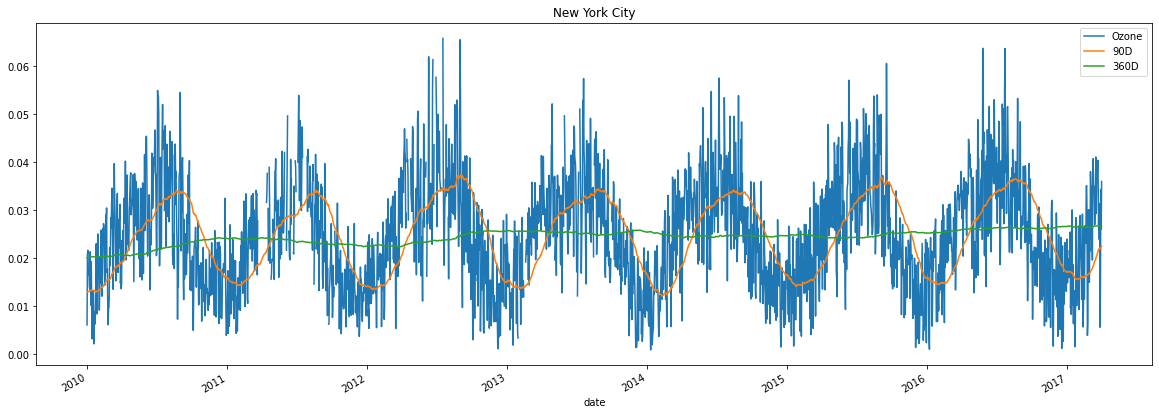

In [2]:
# Import and inspect ozone data here
data = pd.read_csv("./air_quality_data/ozone_nyc.csv", parse_dates=["date"], index_col=["date"])
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.rolling(window="90D").mean()["Ozone"]
data['360D'] = data.rolling(window="360D").mean()["Ozone"]

# Plot data

data['2010':].plot(title='New York City')
plt.show()

#### Rolling 360-day median & std. deviation for nyc ozone data since 2000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 96.4 KB
None


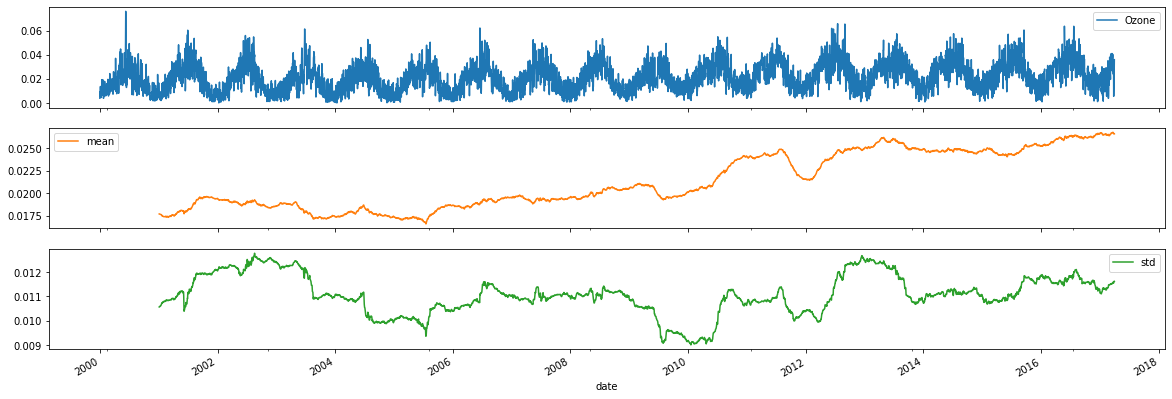

In [3]:
plt.rcParams['figure.figsize'] = [20, 7]

# Import and inspect ozone data here
data = pd.read_csv("./air_quality_data/ozone_nyc.csv", parse_dates=["date"], index_col=["date"]).dropna()
print(data.info())

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(window=360).agg(["mean", "std"])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()

#### Rolling quantiles for daily air quality in nyc

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


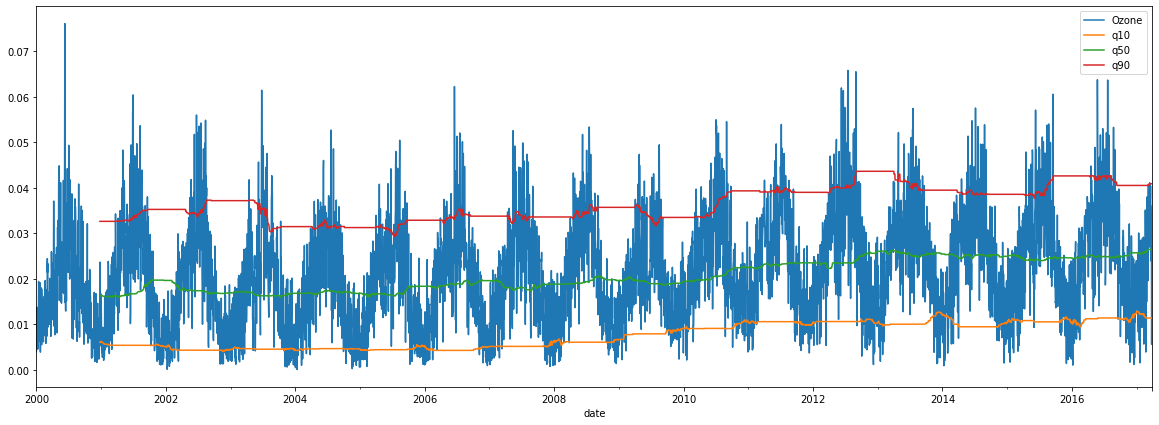

In [4]:
# Import and inspect ozone data here
data = pd.read_csv("./air_quality_data/ozone_nyc.csv", parse_dates=["date"], index_col=["date"]).dropna()

# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()


### Expanding window functions with pandas

#### Cumulative sum vs .diff()

In [5]:
# Import and inspect ozone data here
data = pd.read_csv("./stock_data/google.csv", parse_dates=["Date"], index_col=["Date"]).dropna()

# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))


True


#### Cumulative return on $1,000 invested in google vs apple I

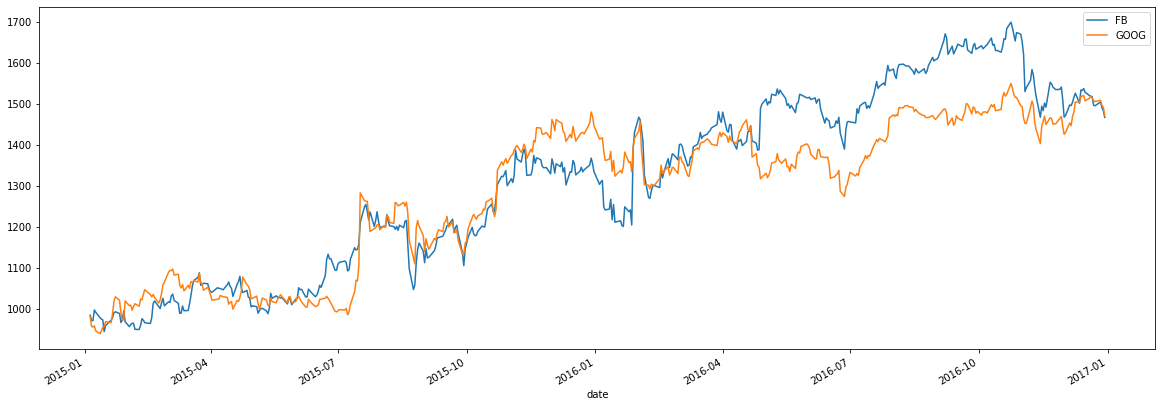

In [6]:
# Import and inspect ozone data here
data = pd.read_csv("./stock_data/goog_fb.csv", parse_dates=["date"], index_col=["date"]).dropna()

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 

cumulative_return.mul(investment).plot()
plt.show()

#### Cumulative return on $1,000 invested in google vs apple II

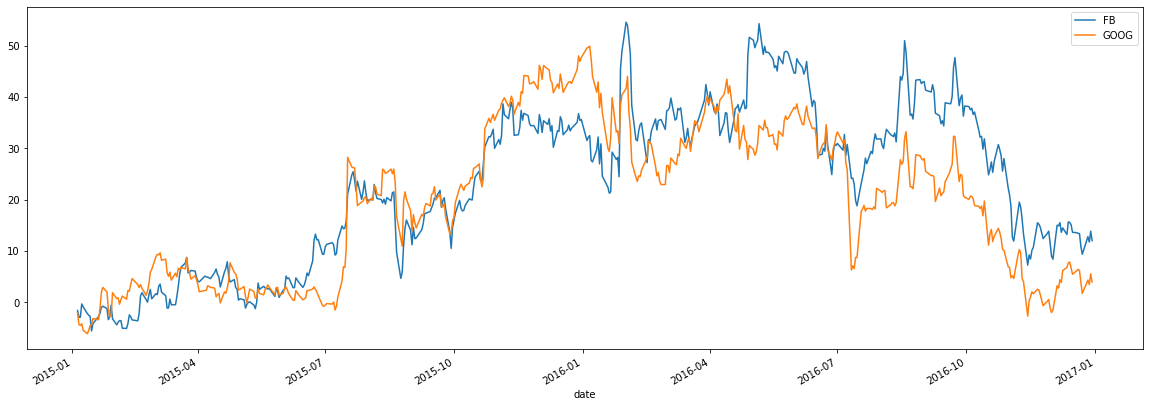

In [7]:
# Import and inspect ozone data here
data = pd.read_csv("./stock_data/goog_fb.csv", parse_dates=["date"], index_col=["date"]).dropna()

# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling(window='360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

### Case study: S&P500 price simulation

#### Random walk I

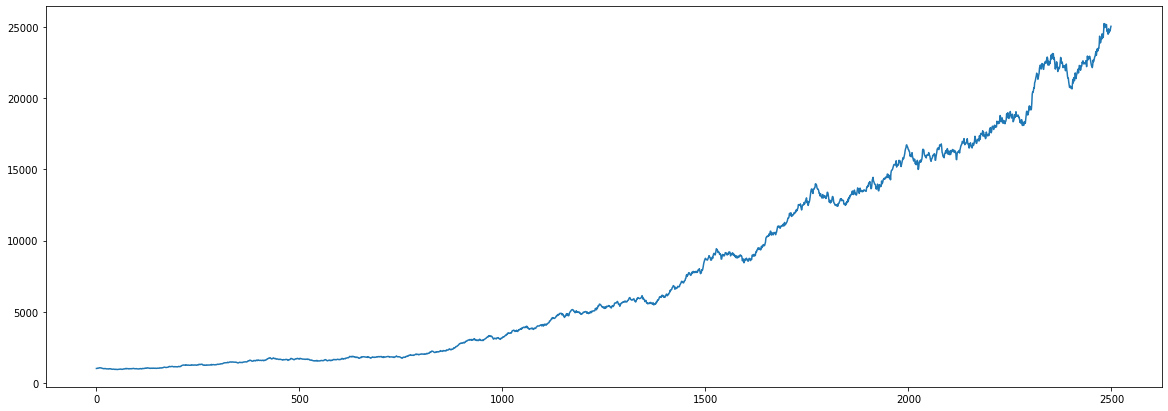

In [8]:
from numpy.random import normal, seed
from scipy.stats import norm

# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()

plt.show()

#### Random walk II

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


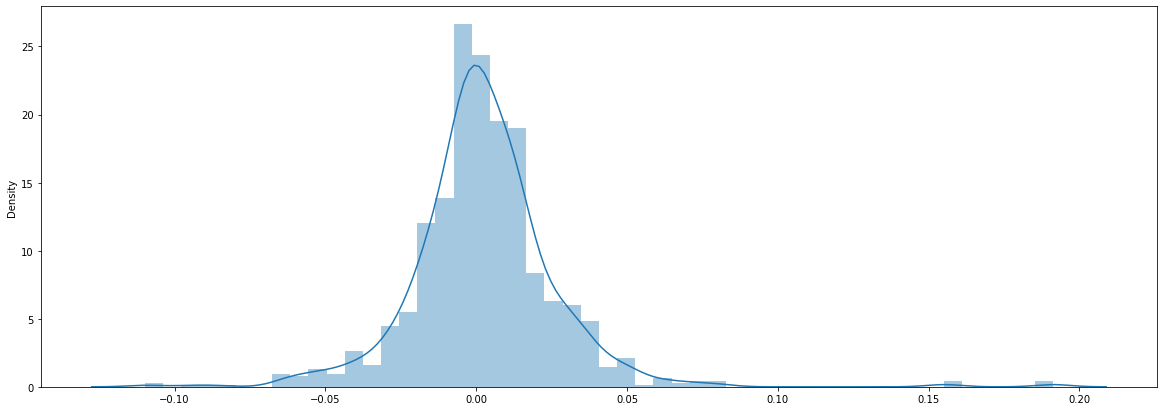

In [9]:
from numpy.random import choice
from scipy.stats import norm
import seaborn as sns

data = pd.read_csv("./stock_data/fb.csv", header=None).dropna()
data = data.rename({0: "date", 1:"fb"}, axis=1)

fb = data.fb

# Set seed here
seed(42)

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk )
plt.show()


#### Random walk III

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2012-05-17 to 2017-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1267 non-null   float64
dtypes: float64(1)
memory usage: 59.8 KB
None
count    1267.000000
mean       70.268102
std        42.386094
min        27.215378
25%        36.731230
50%        57.615035
75%        89.596022
max       193.763962
Name: _random, dtype: float64


/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11962bd60> has a label of '_random' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


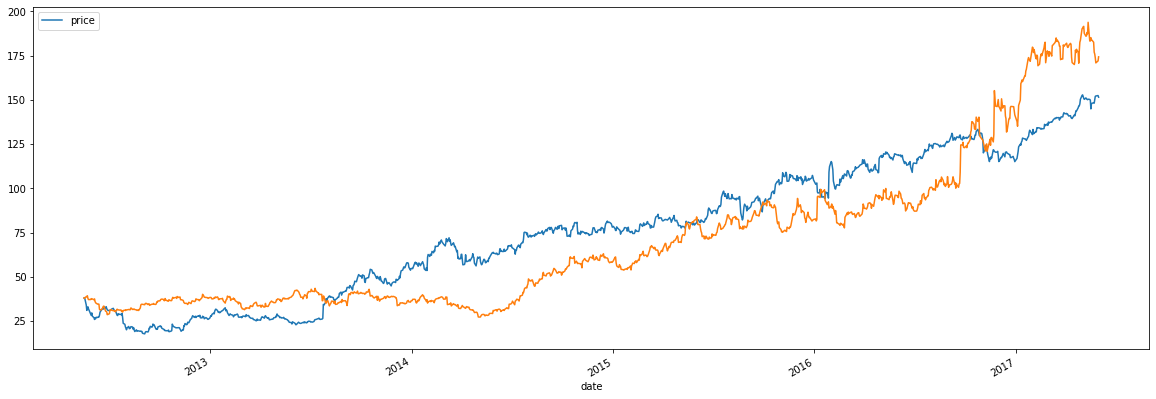

In [28]:
fb = pd.read_csv("./stock_data/fb.csv", header=None).dropna().rename({0: "date", 1:"price"}, axis=1)

random_walk = pd.read_csv("./stock_data/random_walk.csv", header=None).dropna().rename({0: "id", 1:"price"}, axis=1).dropna()
random_walk = random_walk.price

fb["date"] = pd.DatetimeIndex(fb.date)

# Set date column as index
fb = fb.set_index("date")
# Set the frequency to calendar daily
fb.asfreq("D")


random_walk.index = fb.index[1:]

# Select fb start price here
start = fb.price.first('D')
print(fb.info())

random_walk = random_walk.add(1)
random_price = start.append(random_walk)


# Calculate cumulative product here
random_price = random_price.cumprod()



# Insert into fb and plot
fb['_random'] = random_price



print(fb['_random'].describe())
fb.plot()

plt.show()


### Relationships between time series : correlation  

####  Varies between -1 and +1 :  
 - $\large{r} = \frac{Avg(X) Avg(Y)}{Std(X)Std(Y)}$

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


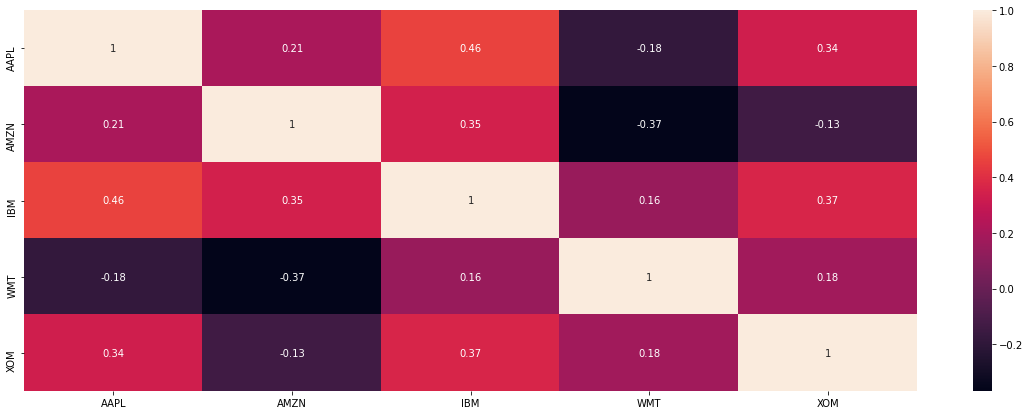

In [56]:
import seaborn as sns
data = pd.read_csv("./stock_data/5_stocks.csv", parse_dates=["Date"], index_col=["Date"])

# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample("A").last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()
